<div style="display: flex;">
    <div style="flex: 1;">
        <h1>Aprendizaje computacional 2023</h1>
        <h2>Unidad 4</h2>
        <p><strong>Nombre:</strong> David Aaron Ramirez Olmeda<br>
        <strong>Programa:</strong> Maestría en Ciencia de Datos e Información</p>
    </div>
    <img src="https://pbs.twimg.com/profile_images/1674912653049774081/Lj1u22X8_400x400.jpg" alt="Imagen de Portada" width="170" height="170">
</div>

In [19]:
from scipy.stats import multivariate_normal, norm, kruskal
from sklearn.datasets import load_diabetes, load_breast_cancer, load_iris
from sklearn.feature_selection import f_regression, SelectKBest, SequentialFeatureSelector
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import recall_score, make_scorer
from sklearn.naive_bayes import GaussianNB
from sklearn import decomposition
from EvoMSA.model import GaussianBayes
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
import seaborn as sns
sns.set_theme()

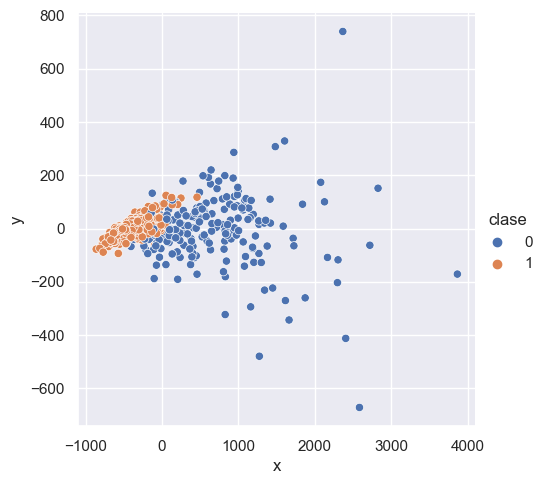

In [20]:
# Carga de datos y reducción de dimensionalidad
D, y = load_breast_cancer(return_X_y=True)
pca = decomposition.PCA(n_components=2).fit(D)
Xn = pca.transform(D)
data = pd.DataFrame({'x': Xn[:, 0], 'y': Xn[:, 1], 'clase': y})

# Creación de la gráfica de dispersión
sns.relplot(data=data, kind='scatter', x='x', y='y', hue='clase')

# Mostrar la gráfica
plt.show()

Escoger el número de variables seleccionadas, utilizando la estadística de kruskal, en el conjunto de delitos, usando su conjunto de entrenamiento.

El conjunto de delitos se puede descargar de la siguiente liga https://github.com/INGEOTEC/AprendizajeComputacional/releases/download/v2.0/delitos.zip

In [21]:
T = np.loadtxt('delitos/delitos_train_data.csv', delimiter=',')
y_t = np.loadtxt('delitos/delitos_train_label.csv', delimiter=',')

In [24]:
import numpy as np
from scipy.stats import kruskal
# Escoger el número de variables seleccionadas, utilizando la estadística de kruskal, en el conjunto de delitos, usando su conjunto de entrenamiento.
# Cargar los datos de entrenamiento
T = np.loadtxt('delitos/delitos_train_data.csv', delimiter=',')
y_t = np.loadtxt('delitos/delitos_train_label.csv', delimiter=',')

# Definir los valores de 𝛼 que deseas probar
alpha_values = [0.1, 0.001, 0.05]

# Inicializar una lista para almacenar el número de variables seleccionadas para cada 𝛼
selected_variables_count = []

# Iterar a través de los diferentes valores de 𝛼
for alpha in alpha_values:
    # Calcular el valor p utilizando Kruskal-Wallis para cada variable
    p_values = [kruskal(*[T[y_t == label][:, i] for label in np.unique(y_t)]).pvalue
                for i in range(T.shape[1])]
    
    # Seleccionar las variables con un valor p menor o igual a 𝛼
    selected_variables = [i for i, p in enumerate(p_values) if p <= alpha]
    
    # Agregar el número de variables seleccionadas a la lista
    selected_variables_count.append(len(selected_variables))

# Imprimir el número de variables seleccionadas para cada 𝛼
for i, alpha in enumerate(alpha_values):
    print(f"Para 𝛼 = {alpha}, número de variables seleccionadas: {selected_variables_count[i]}")


Para 𝛼 = 0.1, número de variables seleccionadas: 1706
Para 𝛼 = 0.001, número de variables seleccionadas: 1136
Para 𝛼 = 0.05, número de variables seleccionadas: 1646


Utilizando un clasificador Bayesiano Ingenuo en los siguientes datos https://github.com/INGEOTEC/AprendizajeComputacional/releases/download/v2.0/delitos.zip Seleccionar el macro-recall utilizando una validación cruzada con k-iteraciones y midiendo el rendimiento en el conjunto de prueba

In [26]:
T = np.loadtxt('delitos/delitos_train_data.csv', delimiter=',')
y_t = np.loadtxt('delitos/delitos_train_label.csv', delimiter=',')
G = np.loadtxt('delitos/delitos_test_data.csv', delimiter=',')
y_g = np.loadtxt('delitos/delitos_test_label.csv', delimiter=',')

In [43]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score

# Cargar los datos de entrenamiento y prueba
T = np.loadtxt('delitos/delitos_train_data.csv', delimiter=',')
y_t = np.loadtxt('delitos/delitos_train_label.csv', delimiter=',')
G = np.loadtxt('delitos/delitos_test_data.csv', delimiter=',')
y_g = np.loadtxt('delitos/delitos_test_label.csv', delimiter=',')

# Inicializar el clasificador Bayesiano Ingenuo
nb_classifier = GaussianNB()

# Definir la métrica de recall macro para usar en la validación cruzada
macro_recall_scorer = make_scorer(recall_score, average='macro')

# Realizar el barajado (shuffle) de los datos
shuffle_indices = np.arange(len(T))
np.random.shuffle(shuffle_indices)
T_shuffled = T[shuffle_indices]
y_t_shuffled = y_t[shuffle_indices]

# Realizar la validación cruzada con k-iteraciones (k=5)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(nb_classifier, T_shuffled, y_t_shuffled, cv=cv, scoring=macro_recall_scorer)

# Entrenar el modelo en el conjunto de entrenamiento completo
nb_classifier.fit(T_shuffled, y_t_shuffled)

# Realizar la predicción en el conjunto de prueba
y_pred = nb_classifier.predict(G)

# Calcular el macro-recall en el conjunto de prueba
macro_recall_test = recall_score(y_g, y_pred, average='macro')

# Imprimir los resultados
print("Macro-Recall en validación cruzada:")
for i, score in enumerate(cross_val_scores, start=1):
    print(f"Fold {i}: {score:.4f}")
print(f"Macro-Recall en conjunto de prueba: {macro_recall_test:.4f}")


Macro-Recall en validación cruzada:
Fold 1: 0.8473
Fold 2: 0.8273
Fold 3: 0.8434
Fold 4: 0.8520
Fold 5: 0.8383
Macro-Recall en conjunto de prueba: 0.7882


In [36]:
cross_val_scores

array([0.80133872, 0.85015155, 0.87981221, 0.85201878, 0.81004695])

In [37]:
macro_recall_test

0.7881764269829503

In [38]:
cv

StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [39]:
cross_val_scores

array([0.80133872, 0.85015155, 0.87981221, 0.85201878, 0.81004695])

In [44]:
np.mean(cross_val_scores)

0.8416622184907034

LLa 1 me salió mal

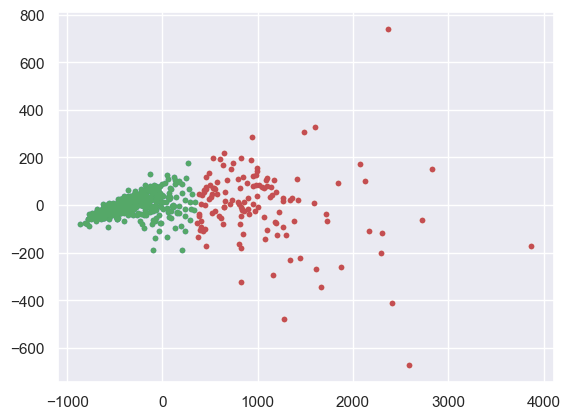

In [46]:
X, y = datasets.load_breast_cancer(return_X_y=True)
pca = decomposition.PCA(n_components=2).fit(X)
Xn = pca.transform(X)
m = KMeans(n_clusters=2).fit(X)
mask = m.predict(X)

plt.plot(Xn[mask==0, 0], Xn[mask==0, 1], '.')
plt.plot(Xn[mask==1, 0], Xn[mask==1, 1], '.')
plt.show()

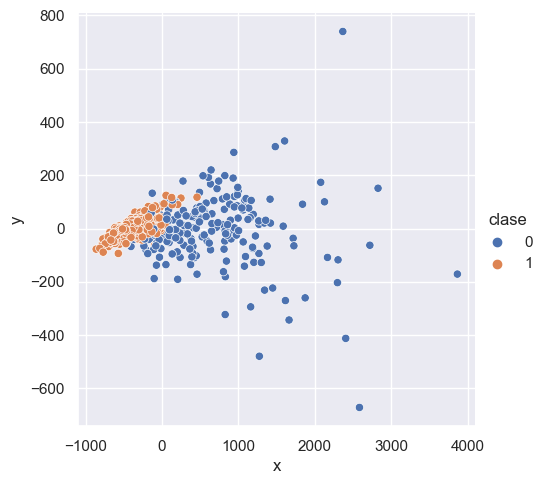

In [47]:
# Carga de datos y reducción de dimensionalidad
D, y = load_breast_cancer(return_X_y=True)
pca = decomposition.PCA(n_components=2).fit(D)
Xn = pca.transform(D)
data = pd.DataFrame({'x': Xn[:, 0], 'y': Xn[:, 1], 'clase': y})

# Creación de la gráfica de dispersión
sns.relplot(data=data, kind='scatter', x='x', y='y', hue='clase')

# Mostrar la gráfica
plt.show()